# Superbowl History


In [2]:
# Import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests

In [4]:
# Imported Superbowl Dataset
df = pd.read_csv(r"C:\Users\Issa.Flynn\Desktop\superbowl.csv")
df.dropna(axis=1)
df.fillna('NaN')
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   Year        54 non-null     int64 
 2   SB          54 non-null     object
 3   Winner      54 non-null     object
 4   Winner Pts  54 non-null     int64 
 5   Loser       54 non-null     object
 6   Loser Pts   54 non-null     int64 
 7   MVP         54 non-null     object
 8   Stadium     54 non-null     object
 9   City        54 non-null     object
 10  State       54 non-null     object
dtypes: int64(3), object(8)
memory usage: 4.8+ KB


In [5]:
#Printed out the first 5 rows of our data
df.head()

,Date,Year,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb-02,2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb-03,2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb-04,2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb-05,2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb-07,2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [6]:
#printing out the full dataframe
df

,Date,Year,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb-02,2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb-03,2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb-04,2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb-05,2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb-07,2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
5,Feb-01,2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
6,Feb-02,2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey
7,Feb-03,2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana
8,Feb-05,2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana
9,Feb-06,2011,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,Aaron Rodgers,Cowboys Stadium,Arlington,Texas


In [7]:
#importing csv with superbowl records from 2021 onwards
df2 = pd.read_csv(r"C:\Users\Issa.Flynn\OneDrive - Bytedance\superbowl_new.csv")
df2

,Date,Year,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb-01,2021,LV(55),Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
1,Feb-13,2022,LVI(56),Los Angeles Rams,23,Cincinnati Bengals,20,Cooper Kupp,SoFi Stadium,Inglewood,California
2,Feb-12,2023,LVII(57),Kansas City Chiefs,38,Philadelphia Eagles,35,Patrick Mahomes,State Farm Stadium,Glendale,Arizona


In [8]:
# Merge the 2 dataframes together
combined = ([df, df2])
superbowl = pd.concat(combined)
superbowl

,Date,Year,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb-02,2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb-03,2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb-04,2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb-05,2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb-07,2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
5,Feb-01,2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
6,Feb-02,2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey
7,Feb-03,2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana
8,Feb-05,2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana
9,Feb-06,2011,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,Aaron Rodgers,Cowboys Stadium,Arlington,Texas


In [9]:
#sorted the values by year in descending order and set the date as the index
superbowl_new = superbowl.sort_values('Year', ascending=False).set_index('Year')
superbowl_new

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
Year,,,,,,,,,,
2023,Feb-12,LVII(57),Kansas City Chiefs,38,Philadelphia Eagles,35,Patrick Mahomes,State Farm Stadium,Glendale,Arizona
2022,Feb-13,LVI(56),Los Angeles Rams,23,Cincinnati Bengals,20,Cooper Kupp,SoFi Stadium,Inglewood,California
2021,Feb-01,LV(55),Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
2020,Feb-02,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
2019,Feb-03,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2018,Feb-04,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
2017,Feb-05,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
2016,Feb-07,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
2015,Feb-01,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona


I will call the describe function to tell us more about the integers in our dataframe

In [17]:
superbowl.describe().round(decimals=1).drop(['Year'], axis=1)

,Winner Pts,Loser Pts
count,57.0,57.0
mean,30.1,16.5
std,9.6,7.7
min,13.0,3.0
25%,23.0,10.0
50%,31.0,17.0
75%,35.0,21.0
max,55.0,35.0


Now that I have my data in order, I am going to see who has won/lost the superbowl on the most occasions and represent this on 2 seperate bar charts.

In [547]:
# Winners bar plot
superbowl_new['Count'] = 1
superbowl_grp_win = superbowl_new.groupby('Winner').sum()['Count'].reset_index().sort_values(by = 'Count', ascending=False)
superbowl_grp_win.style.hide_index()


Winner,Count
New England Patriots,6
Pittsburgh Steelers,6
San Francisco 49ers,5
Dallas Cowboys,5
Green Bay Packers,4
New York Giants,4
Kansas City Chiefs,3
Washington Redskins,3
Denver Broncos,3
Miami Dolphins,2


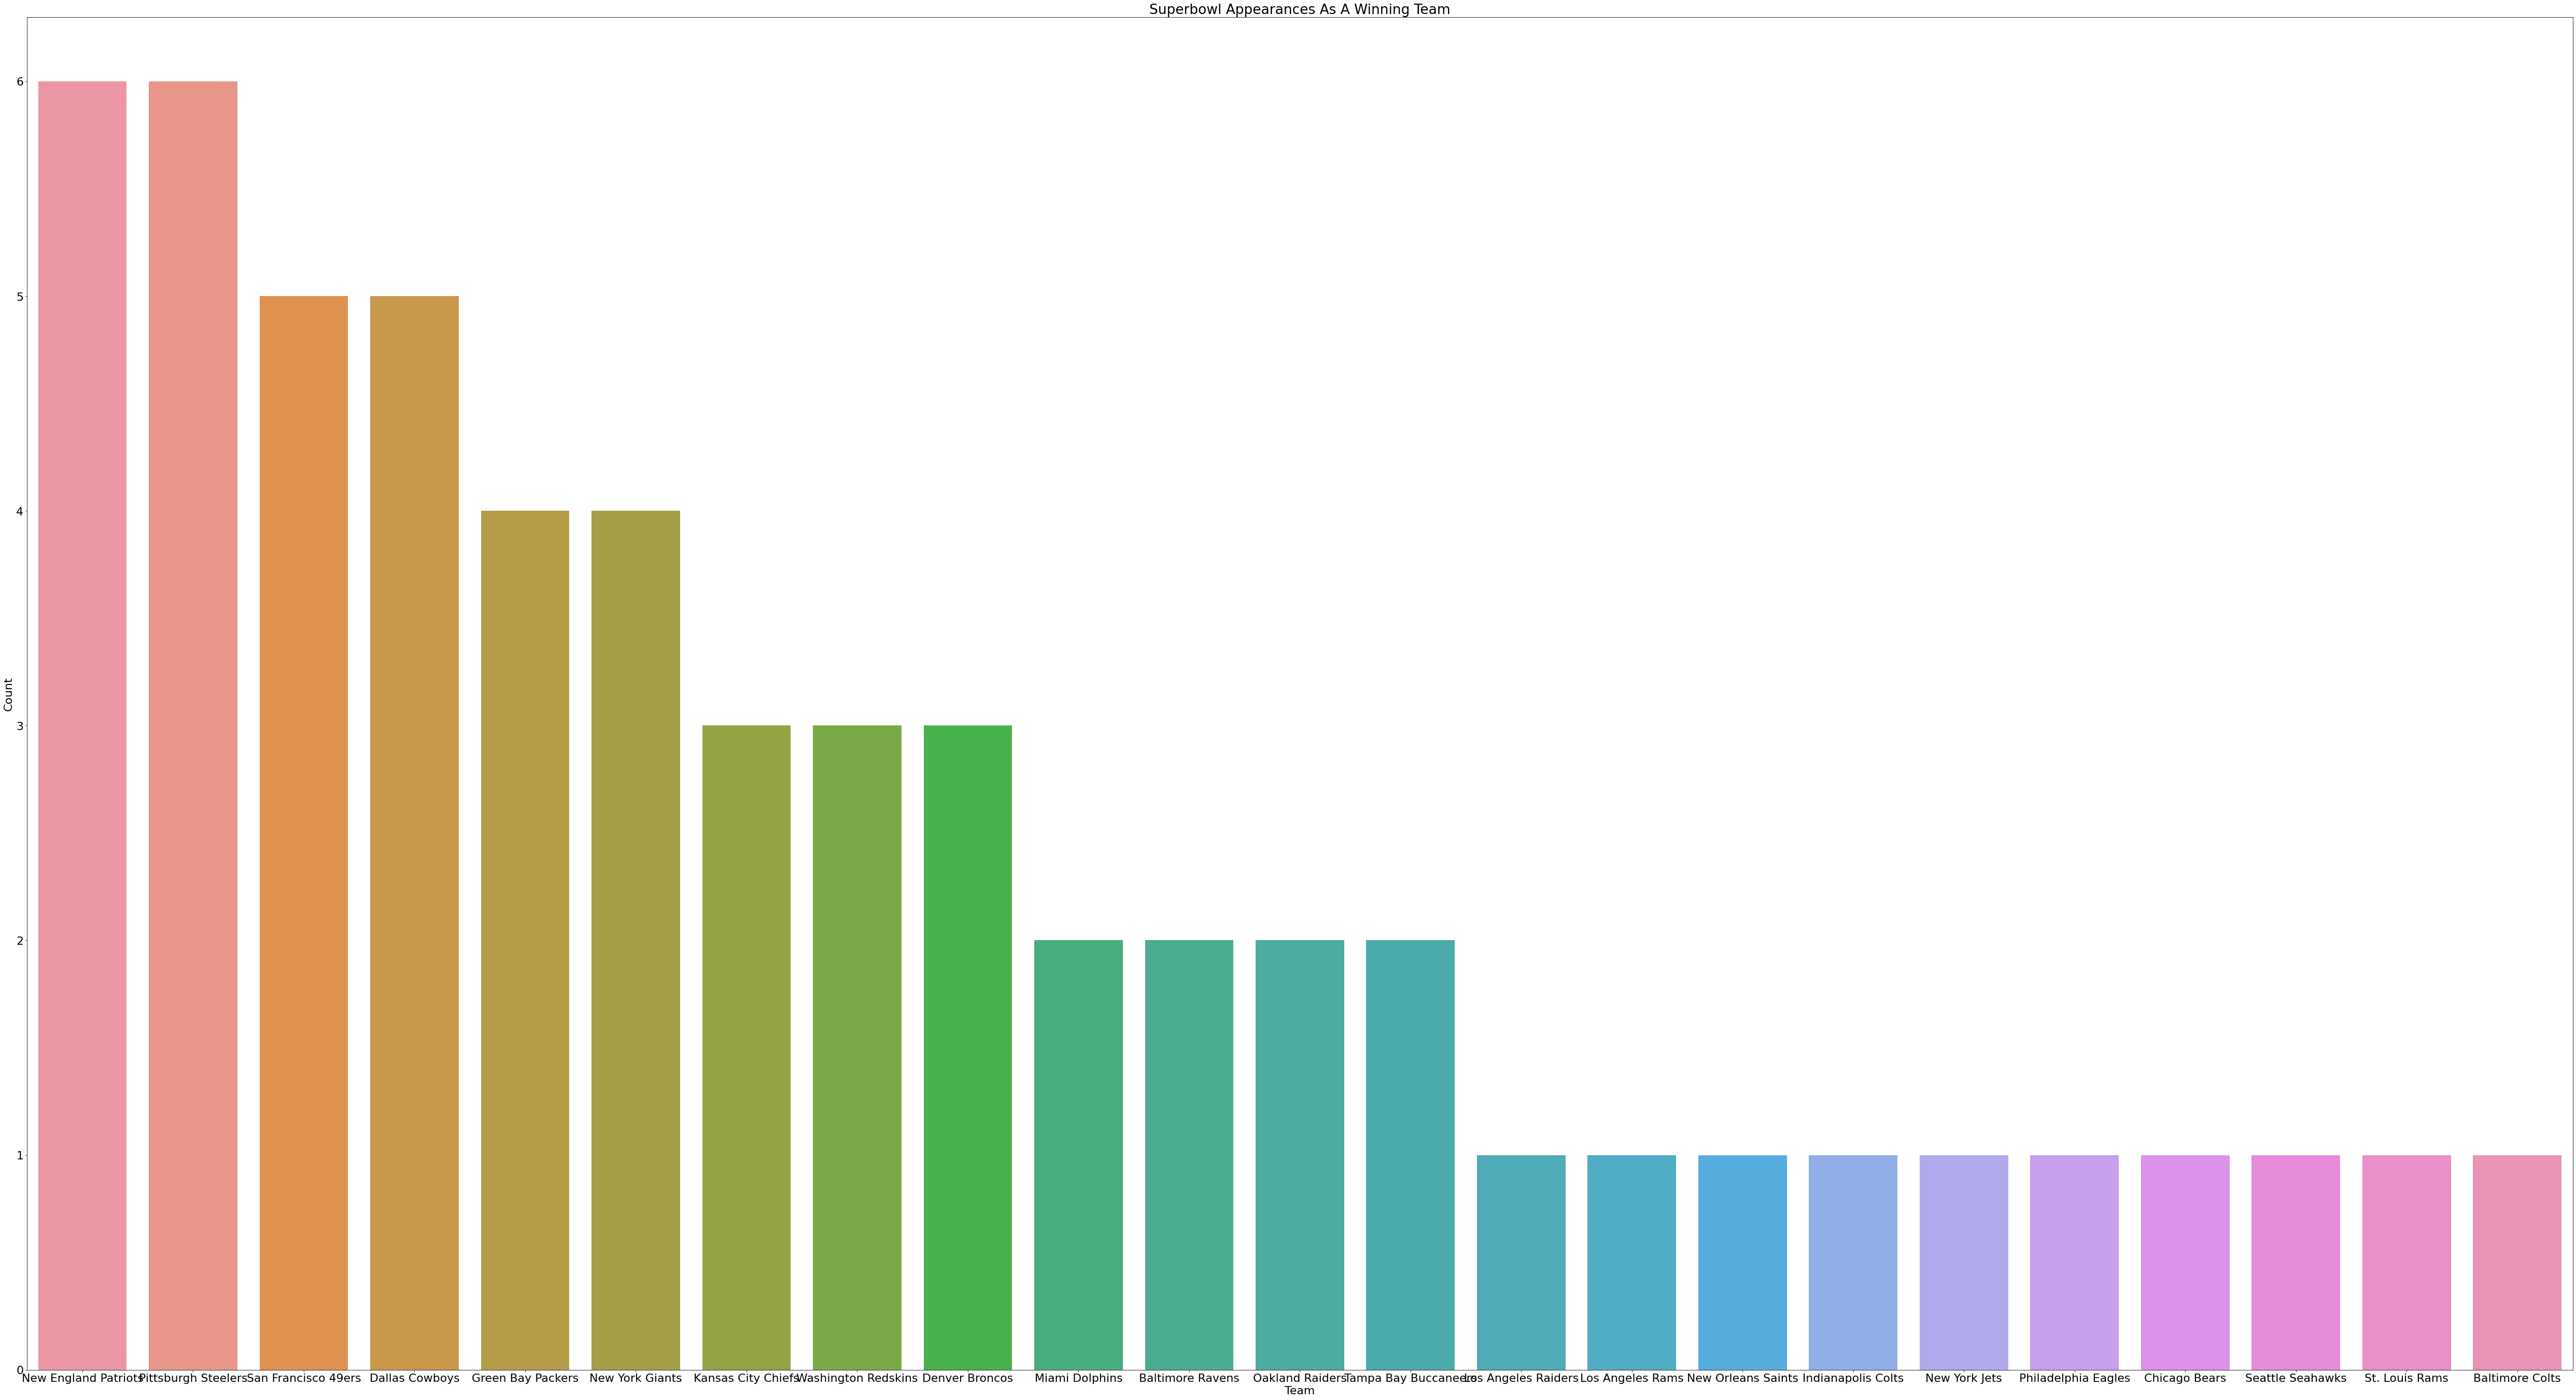

In [633]:
plt.figure(figsize=(88,48))
w = sns.barplot(x='Winner', y='Count', data=superbowl_grp_win)
w.set_title('Superbowl Appearances As A Winning Team', y=1)
w.set(xlabel='Team', ylabel='Count')
plt.show()

In [548]:
# Losers bar plot
superbowl_new['Count'] = 1
superbowl_grp_los = superbowl_new.groupby('Loser').sum()['Count'].reset_index().sort_values(by = 'Count', ascending=False)
superbowl_grp_los.style.hide_index()

Loser,Count
Denver Broncos,5
New England Patriots,5
Buffalo Bills,4
Minnesota Vikings,4
Miami Dolphins,3
Cincinnati Bengals,3
Dallas Cowboys,3
Philadelphia Eagles,3
Atlanta Falcons,2
Seattle Seahawks,2


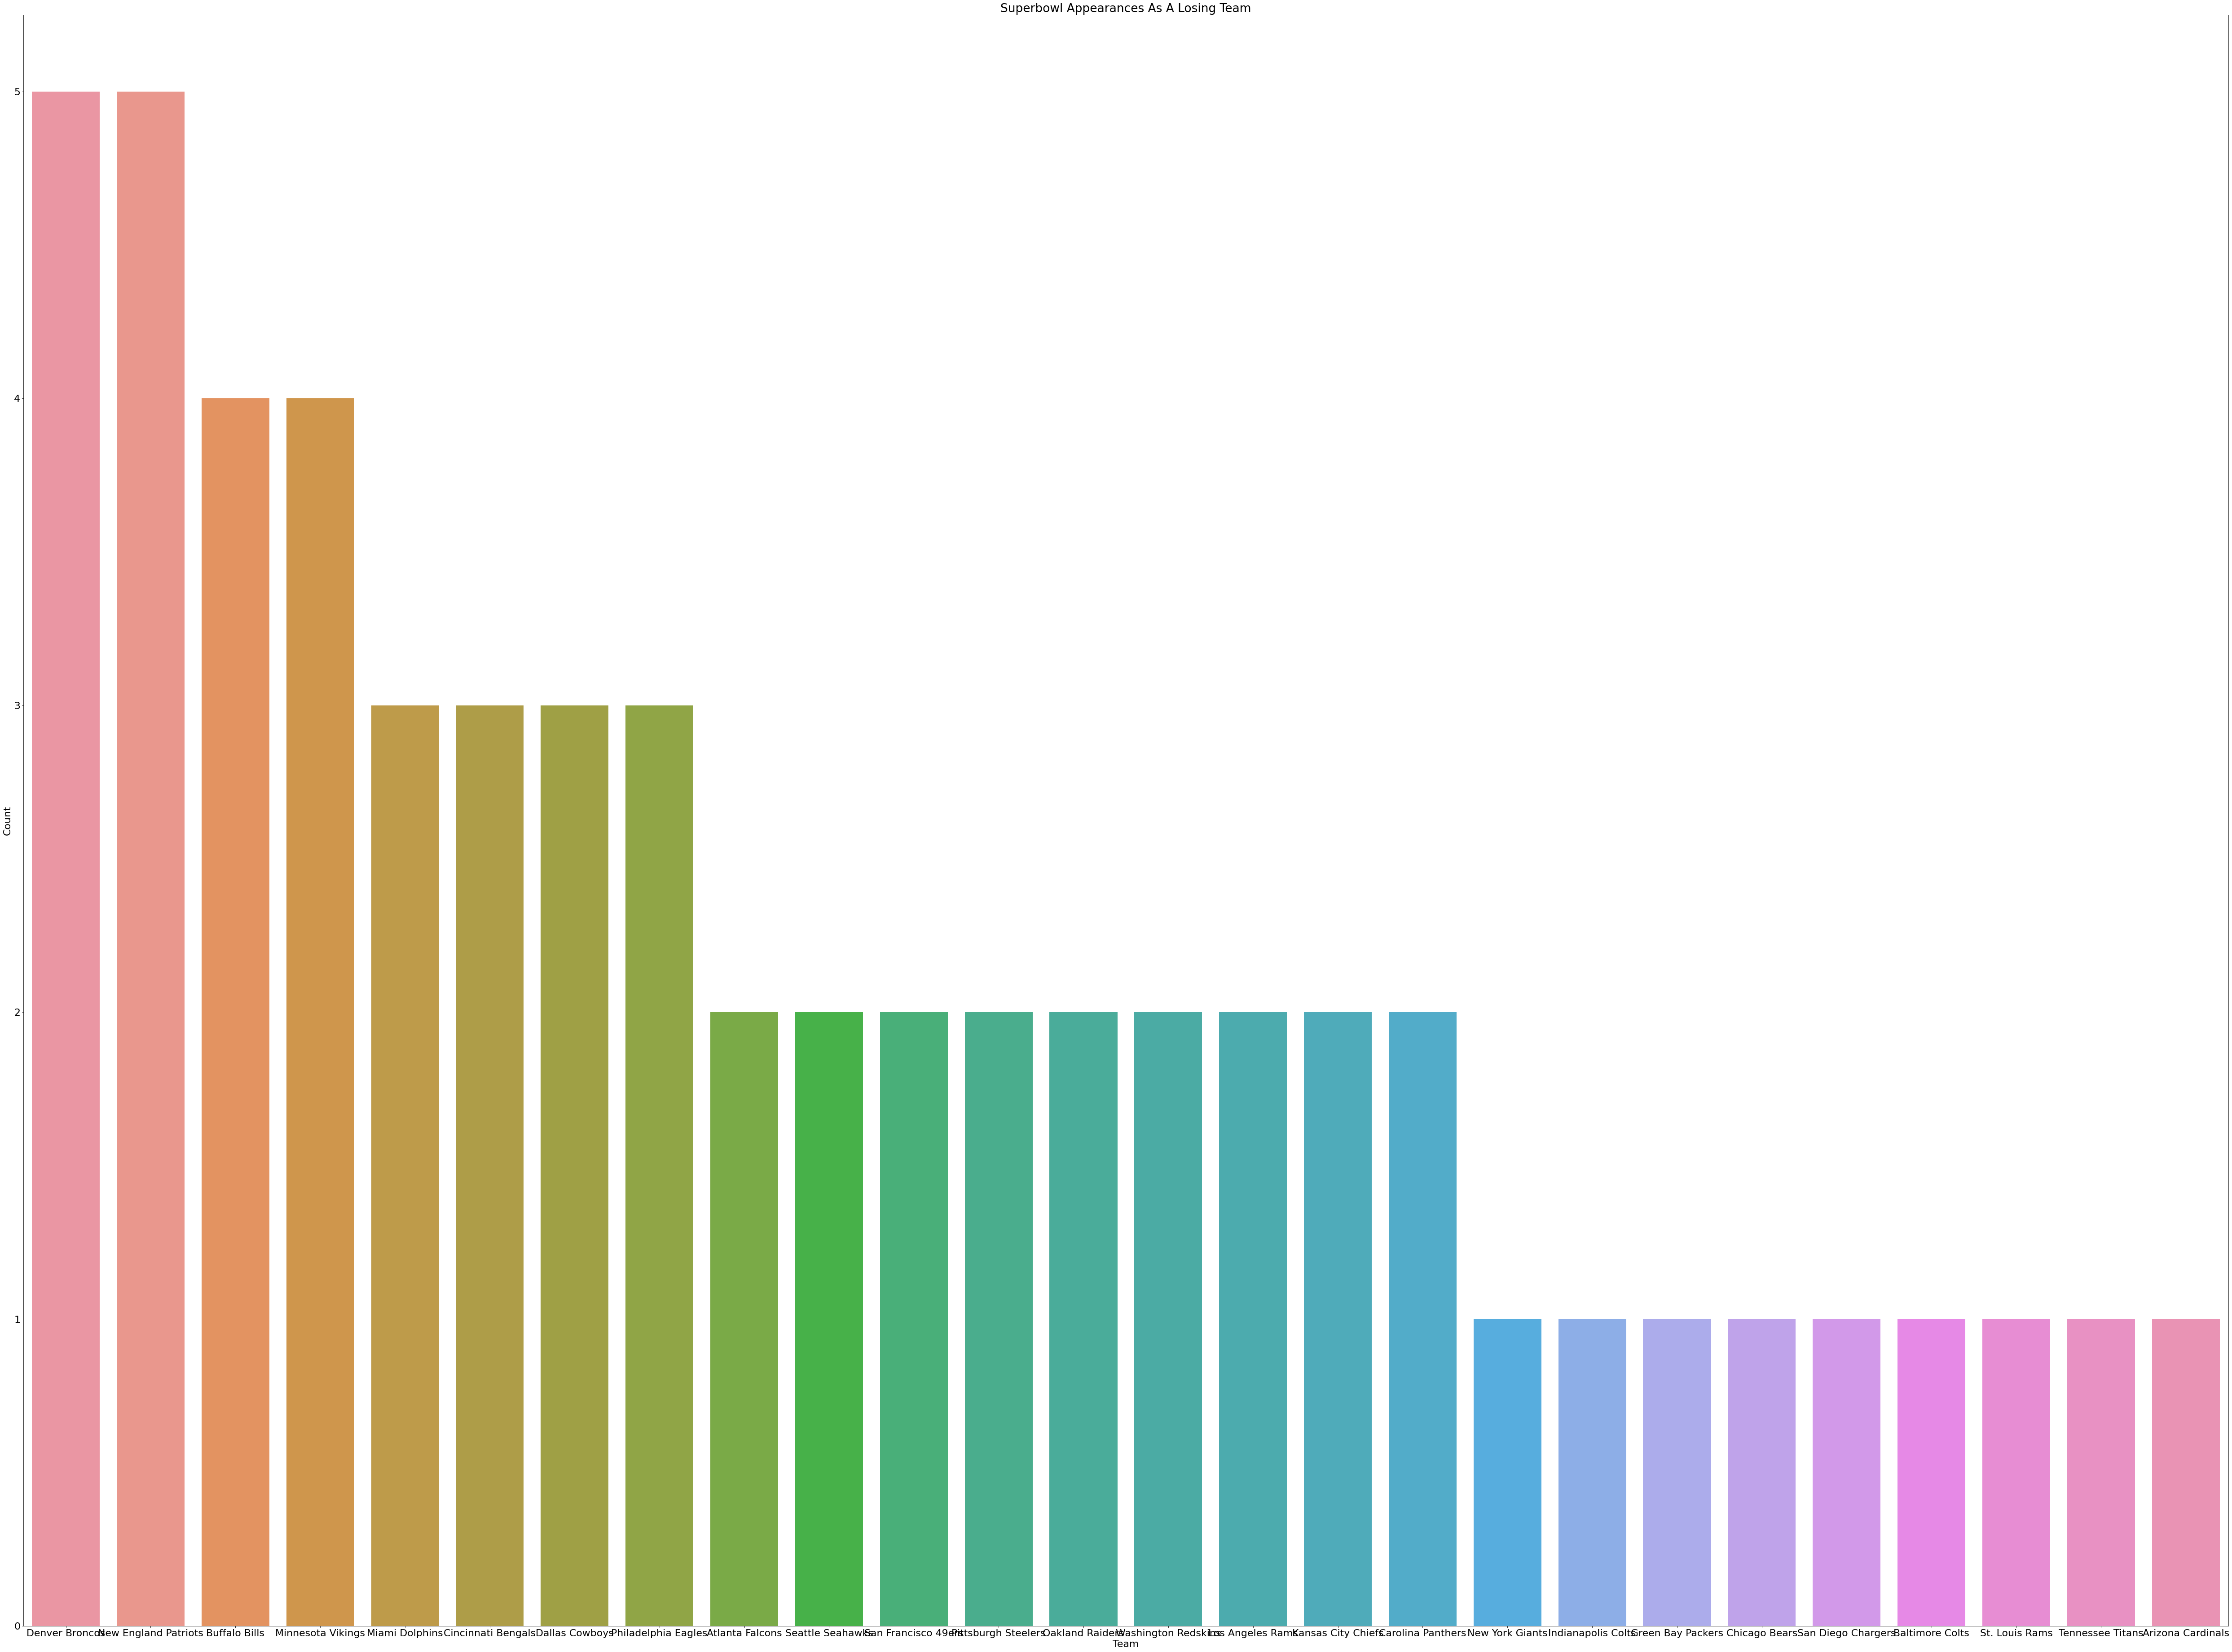

In [632]:
plt.figure(figsize=(88,66))
L = sns.barplot(x='Loser', y='Count', data=superbowl_grp_los)
L.set_title('Superbowl Appearances As A Losing Team', y=1)
L.set(xlabel='Team', ylabel='Count')
plt.show()

I am now going to dive into the scoring history of the competition and see the highest and lowest scores by the winning and losing team.

Highest scoring winning team in the Superbowl

In [175]:
superbowl_new_winhigh = superbowl_new[superbowl_new['Winner Pts'] == superbowl_new['Winner Pts'].max()][['Year', 'Winner', 'Winner Pts']]
superbowl_new_winhigh

,Year,Winner,Winner Pts
Date,,,
Jan-28,1990,San Francisco 49ers,55


San Francisco 49ers have scored the most winning points in the Superbowl. Lets find out the opposite!


In [145]:
superbowl_new_winlow = superbowl_new[superbowl_new['Winner Pts'] == superbowl_new['Winner Pts'].min()][['Year', 'Winner', 'Winner Pts']]
superbowl_new_winlow

,Year,Winner,Winner Pts
Date,,,
Feb-03,2019,New England Patriots,13


The New England Patriots scored the least points as a winning team back in 2019. Moving along, going back to our earlier call of  the describe method of the merged dataframe, we can see that the mean score by a winning team is 30 points, lets see how many winning teams achieved such score or higher.


In [33]:
arr_win = np.mean(superbowl_new['Winner Pts'])
superbowl_new['mean_winnerpts'] = np.round(arr_win).astype(int)


In [387]:
winners_avg = superbowl_new[superbowl_new['Winner Pts'] > mean_winnerpts]
winners_avg[['Winner', 'Winner Pts']]

,Winner,Winner Pts
Year,,
2023,Kansas City Chiefs,38
2021,Tampa Bay Buccaneers,31
2020,Kansas City Chiefs,31
2018,Philadelphia Eagles,41
2017,New England Patriots,34
2014,Seattle Seahawks,43
2013,Baltimore Ravens,34
2011,Green Bay Packers,31
2010,New Orleans Saints,31


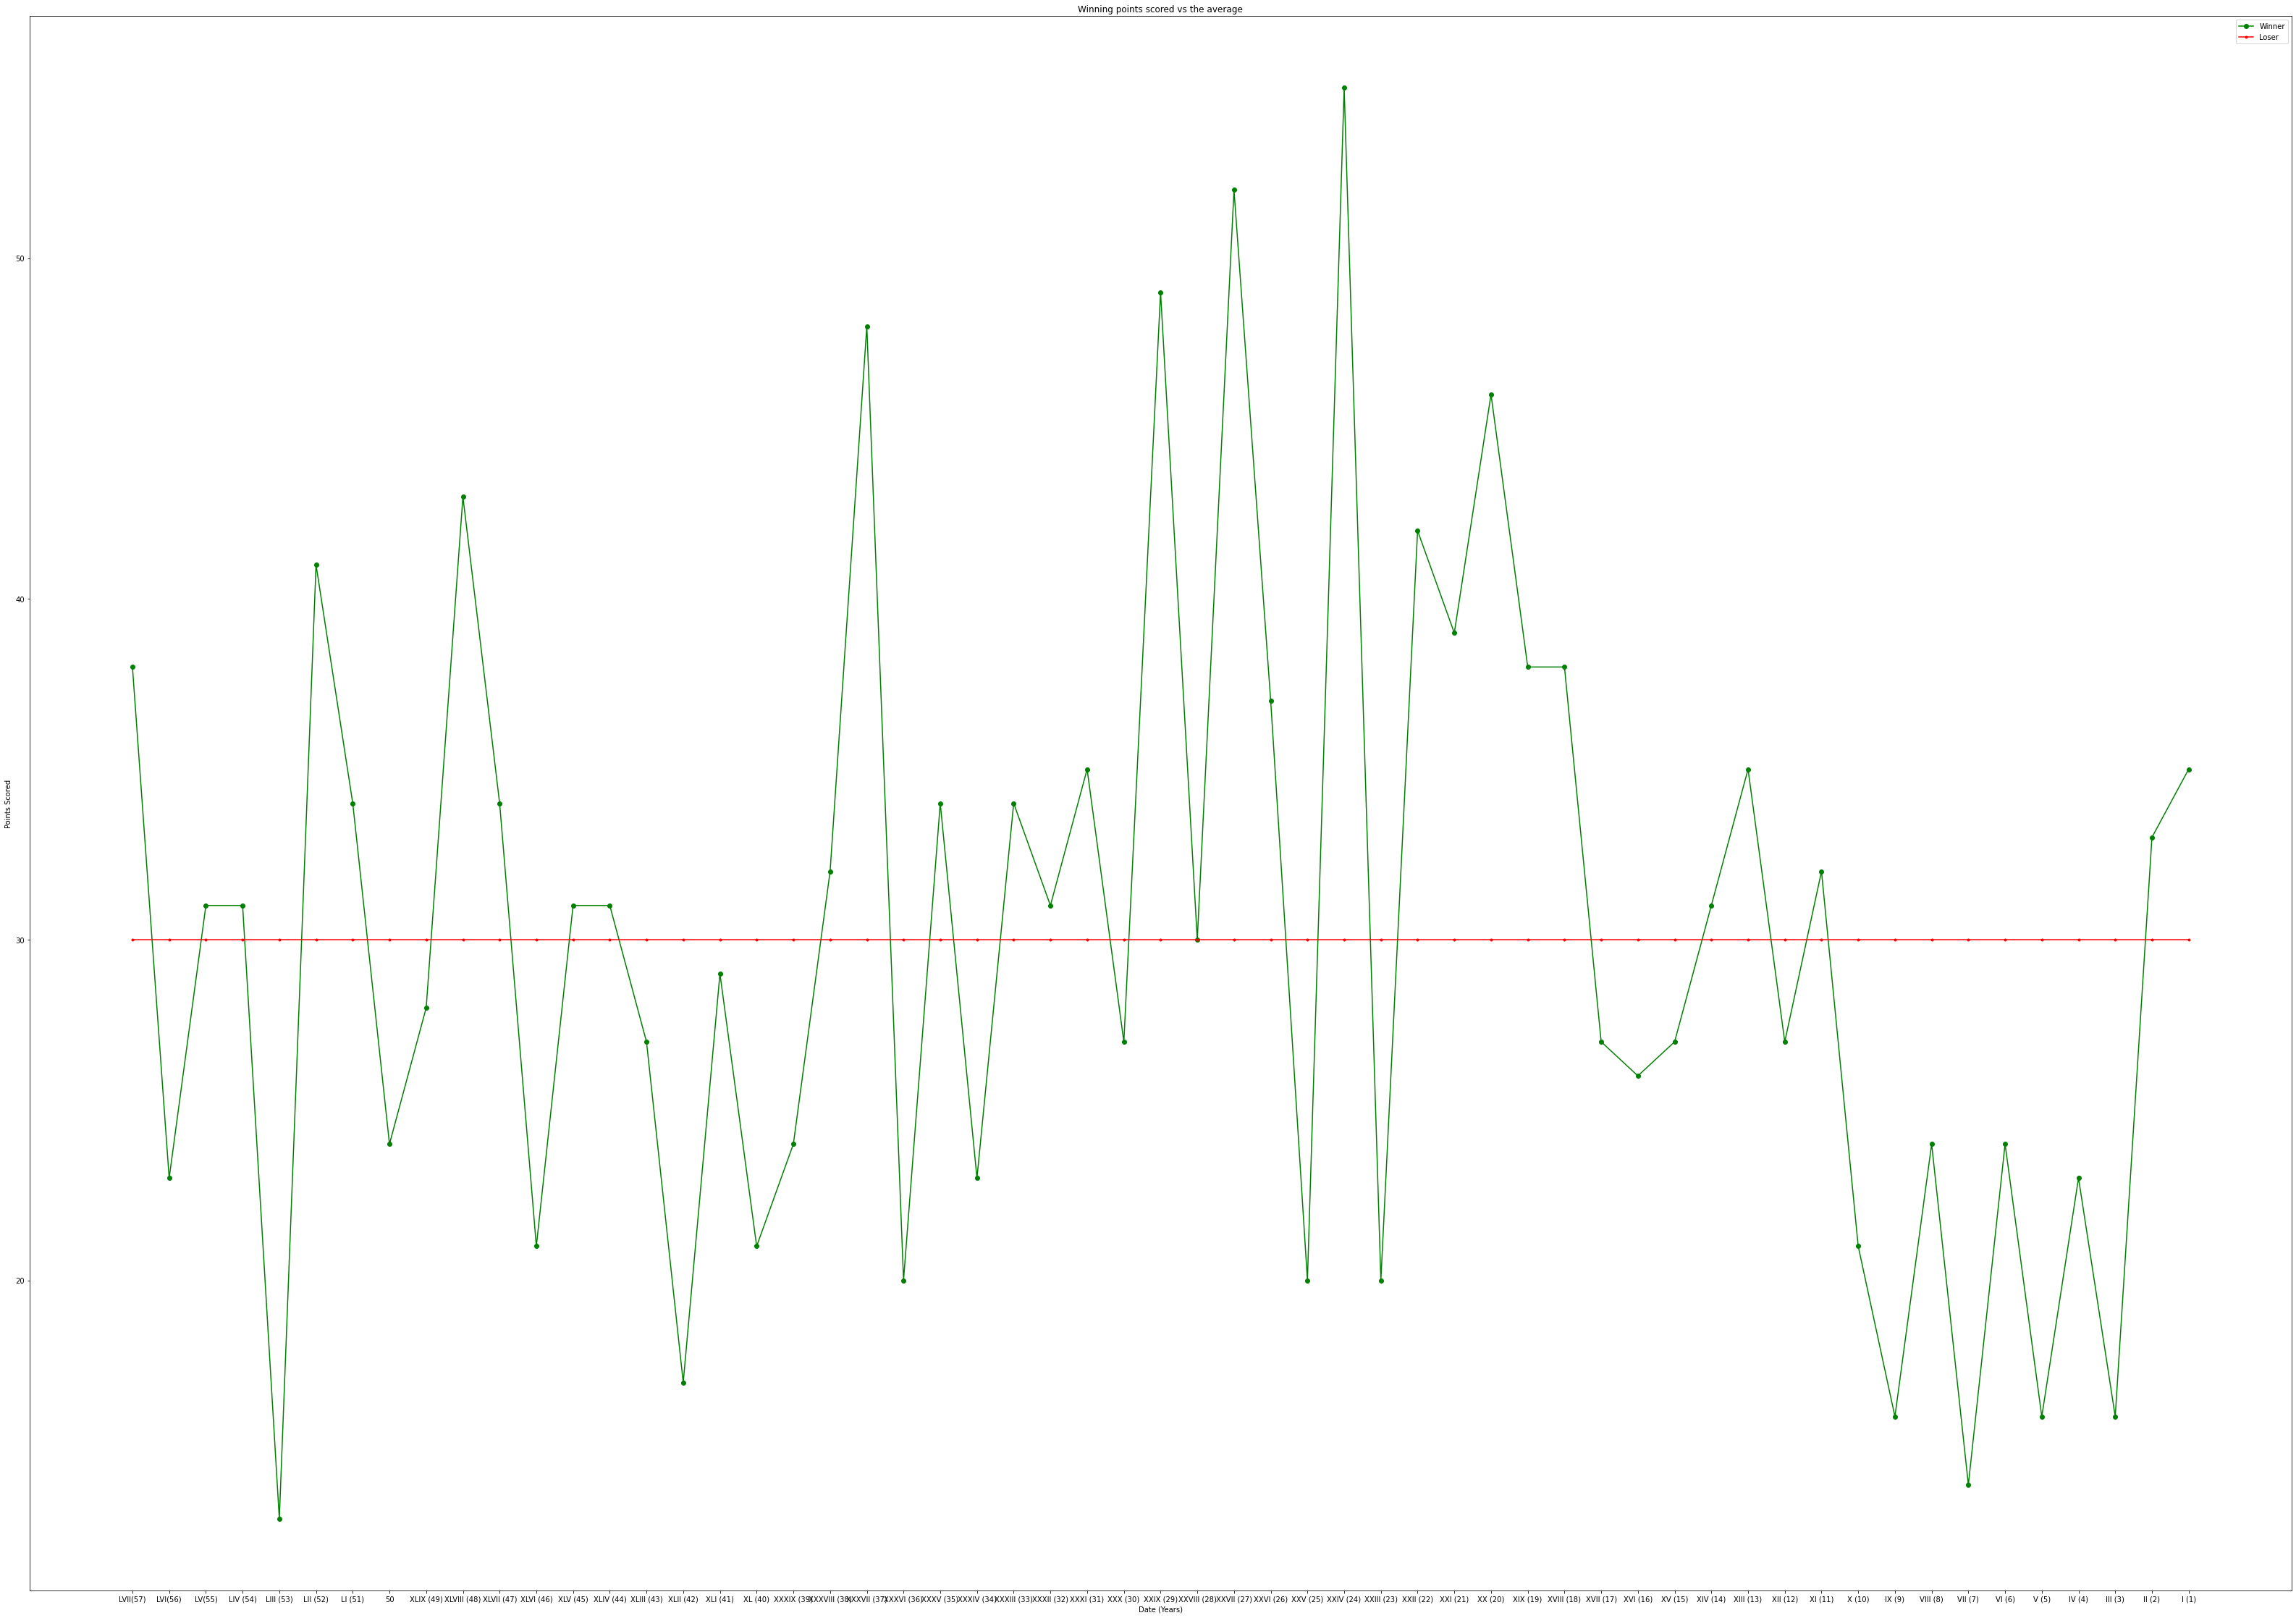

In [45]:
plt.subplots(figsize=(56,40))
plt.plot(superbowl_new['SB'],superbowl_new['Winner Pts'], marker='o', label='Winner', color='green')
plt.plot(superbowl_new['SB'],superbowl_new['mean_winnerpts'], marker='.', label='Loser', color='red')

plt.xlabel('Date (Years)')
plt.ylabel('Points Scored')
plt.title('Winning points scored vs the average')
plt.legend()
plt.show()

Here is some code to find out the total % of teams who have scored over the average

In [389]:
winner_overavg = winners_avg['Winner'].count() / 57 * 100
winner_overavg = np.round(winner_overavg).astype(int)
winner_overavg 

51

Now I want to see how many winning teams have scored less than the mean points in the Superbowl

In [362]:
winner_notavg = superbowl_new[superbowl_new['Winner Pts'] < mean_winnerpts]
winner_notavg[['Winner', 'Winner Pts']]

,Winner,Winner Pts
Year,,
2022,Los Angeles Rams,23
2019,New England Patriots,13
2016,Denver Broncos,24
2015,New England Patriots,28
2012,New York Giants,21
2009,Pittsburgh Steelers,27
2008,New York Giants,17
2007,Indianapolis Colts,29
2006,Pittsburgh Steelers,21


Now to find out the total % of teams who have scored under the average by dividing by 57(total number of winning teams) and multiply by 100

In [392]:
winners_underavg = winner_notavg['Winner'].count() / 57 * 100
winners_underavg = np.round(winner_underavg).astype(int)
winners_underavg

47

It is only right if we check to see if any winners scored exactly 30 points

In [361]:
winners_equal = superbowl_new[superbowl_new['Winner Pts'] == mean_winnerpts]
winners_equal[['Winner', 'Winner Pts']]

,Winner,Winner Pts
Year,,
1994,Dallas Cowboys,30


We want to check the % of winning finalists that have scored exactly the average

In [393]:
winners_equalavg = winners_equal['Winner'].count() / 57 * 100
winners_equalavg = np.round(winners_equalavg).astype(int)
winners_equalavg

2

 We will do the same but for losing teams and will start off with who scored the highest points tally for a losing finalist

In [176]:
superbowl_new_losehigh = superbowl_new[superbowl_new['Loser Pts'] == superbowl_new['Loser Pts'].max()][['Year', 'Loser', 'Loser Pts']]
superbowl_new_losehigh

,Year,Loser,Loser Pts
Date,,,
Feb-12,2023,Philadelphia Eagles,35


Philadelphia Eagles in this years Superbowl managed to score the highest points by a losing team now to check the lowest score!

In [177]:
superbowl_new_loselow = superbowl_new[superbowl_new['Loser Pts'] == superbowl_new['Loser Pts'].min()][['Year', 'Loser', 'Loser Pts']]
superbowl_new_loselow

,Year,Loser,Loser Pts
Date,,,
Feb-03,2019,Los Angeles Rams,3
Jan-16,1972,Miami Dolphins,3


Los Angeles Rams and Miami Dolphins	both scored the lowest tally by a losing team with just 3 points total

Going back to our describe call, we can see that the average points scored by a losing team is 16.5(17 if rounded up). Lets find out how many losing finalists have scored over and under this average.

In [394]:
arr1 = np.mean(superbowl_new['Loser Pts'])
mean_loserpts = np.round(arr1).astype(int)
mean_loserpts

16

In [341]:
losers_above_avg= superbowl_new[superbowl_new['Loser Pts'] > mean_loserpts]
losers_above_avg[['Loser','Loser Pts']]

,Loser,Loser Pts
Year,,
2023,Philadelphia Eagles,35
2022,Cincinnati Bengals,20
2020,San Francisco 49ers,20
2018,New England Patriots,33
2017,Atlanta Falcons,28
2015,Seattle Seahawks,24
2013,San Francisco 49ers,31
2012,New England Patriots,17
2011,Pittsburgh Steelers,25


Finding out what % of teams scored above the losing average

In [395]:
losers_above_avg_new = losers_above_avg['Loser'].count() / 57 * 100
losers_above_avg_new = np.round(losers_above_avg_new).astype(int)
losers_above_avg_new

53

In [342]:
losers_under_avg= superbowl_new[superbowl_new['Loser Pts'] < mean_loserpts] 
losers_under_avg[['Loser','Loser Pts']]

,Loser,Loser Pts
Year,,
2021,Kansas City Chiefs,9
2019,Los Angeles Rams,3
2016,Carolina Panthers,10
2014,Denver Broncos,8
2008,New England Patriots,14
2006,Seattle Seahawks,10
2001,New York Giants,7
1994,Buffalo Bills,13
1990,Denver Broncos,10


% of teams that scored below the average

In [397]:
losers_under_avg_new = losers_under_avg['Loser'].count() / 57 * 100
losers_under_avg_new = np.round(losers_under_avg_new).astype(int)
losers_under_avg_new

42

and finally to check to see if any teams matched the average losing points scored

In [343]:
losers_equal = superbowl_new[superbowl_new['Loser Pts'] == mean_loserpts]
losers_equal[['Loser', 'Loser Pts']]

,Loser,Loser Pts
Year,,
2000,Tennessee Titans,16
1989,Cincinnati Bengals,16
1985,Miami Dolphins,16


Call to figure out the percentage of losing finalists to equal the losing average score

In [398]:
losers_equal_new = losers_equal['Loser'].count() / 57 * 100
losers_equal_new = np.round(losers_equal_new).astype(int)
losers_equal_new

5

I want to produce a graph to show the winning and losing points against each other

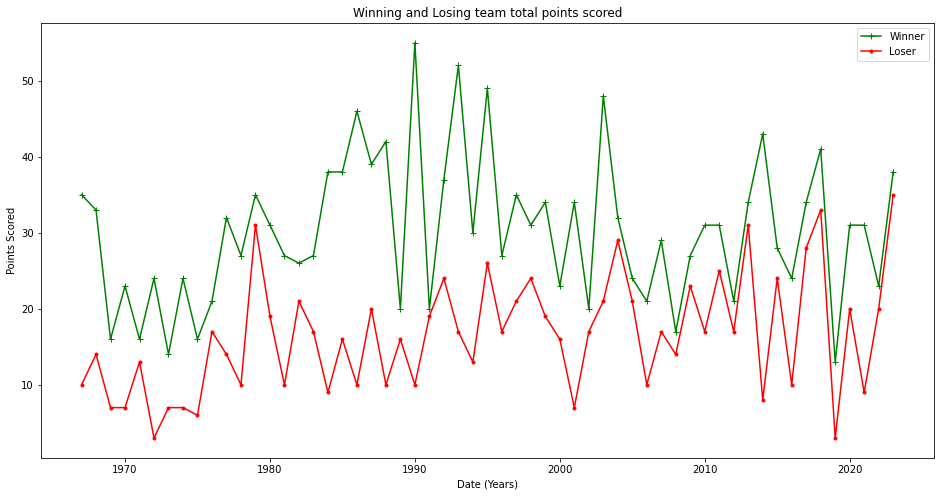

In [79]:
plt.subplots(figsize=(16,8))
plt.plot(superbowl_new['Year'],superbowl_new['Winner Pts'], marker='+', label='Winner', color='green')
plt.plot(superbowl_new['Year'],superbowl_new['Loser Pts'], marker='.', label='Loser', color='red')

plt.xlabel('Date (Years)')
plt.ylabel('Points Scored')
plt.title('Winning and Losing team total points scored')
plt.legend()
plt.show()

Now to move on to the next aspect of our data which is the host venue of this competition

In [288]:
stadium_lists = ["State Farm Stadium", "SoFi Stadium", "Raymond James Stadium", "Hard Rock Stadium",  "Mercedes-Benz Stadium", 
 "U.S. Bank Stadium", "NRG Stadium", "Levi's Stadium", "University of Phoenix Stadium", "MetLife Stadium", 
 "Mercedes-Benz Superdome", "Lucas Oil Stadium", "Cowboys Stadium", "Sun Life Stadium", "Dolphin Stadium",
"Ford Field", "Alltel Stadium", "Reliant Stadium", "Qualcomm Stadium", "Pro Player Stadium", 
 "Sun Devil Stadium", "Joe Robbie Stadium", "Georgia Dome", "Metrodome", "Jack Murphy Stadium", "Stanford Stadium", 
 "Tampa Stadium", "Pontiac Silverdome", "Louisiana Superdome", "Rose Bowl", "Superdome", "Rice Stadium", "Memorial Coliseum", 
 "Tulane Stadium", "Orange Bowl"]


We want to move on to other parts of the data, lets look all the different venues that have hosted this iconic tournament

In [290]:
for x in stadium_lists:
         print(str(x) + ' has hosted the Superbowl at least once ')

State Farm Stadium has hosted the Superbowl at least once 
SoFi Stadium has hosted the Superbowl at least once 
Raymond James Stadium has hosted the Superbowl at least once 
Hard Rock Stadium has hosted the Superbowl at least once 
Mercedes-Benz Stadium has hosted the Superbowl at least once 
U.S. Bank Stadium has hosted the Superbowl at least once 
NRG Stadium has hosted the Superbowl at least once 
Levi's Stadium has hosted the Superbowl at least once 
University of Phoenix Stadium has hosted the Superbowl at least once 
MetLife Stadium has hosted the Superbowl at least once 
Mercedes-Benz Superdome has hosted the Superbowl at least once 
Lucas Oil Stadium has hosted the Superbowl at least once 
Cowboys Stadium has hosted the Superbowl at least once 
Sun Life Stadium has hosted the Superbowl at least once 
Dolphin Stadium has hosted the Superbowl at least once 
Ford Field has hosted the Superbowl at least once 
Alltel Stadium has hosted the Superbowl at least once 
Reliant Stadium ha

Lets see how many times each stadium has hosted this iconic trophy.

In [261]:
stadium_count = superbowl_new.groupby('Stadium').sum()['Count'].reset_index().sort_values(by = 'Count', ascending=False)
stadium_count[:10].style.hide_index()

Stadium,Count
Orange Bowl,5
Louisiana Superdome,5
Rose Bowl,5
Tulane Stadium,3
Raymond James Stadium,3
Tampa Stadium,2
Qualcomm Stadium,2
Memorial Coliseum,2
University of Phoenix Stadium,2
Joe Robbie Stadium,2


Applied a conditional statement to see if stadium hosted count was above or below 4

In [260]:
stadium_count['equal_or_higher_than_4?'] = stadium_count['Count'].apply(lambda x: 'True' if x >= 4 else 'False')
stadium_count.style.hide_index()


Stadium,Count,equal_or_higher_than_4?
Orange Bowl,5,True
Louisiana Superdome,5,True
Rose Bowl,5,True
Tulane Stadium,3,False
Raymond James Stadium,3,False
Tampa Stadium,2,False
Qualcomm Stadium,2,False
Memorial Coliseum,2,False
University of Phoenix Stadium,2,False
Joe Robbie Stadium,2,False


we will move on to cities and states that have hosted this competition over the last 10 year

In [365]:
superbowl_new.iloc[:10, 8:11]


,City,State
Year,,
2023,Glendale,Arizona
2022,Inglewood,California
2021,Tampa,Florida
2020,Miami Gardens,Florida
2019,Atlanta,Georgia
2018,Minneapolis,Minnesota
2017,Houston,Texas
2016,Santa Clara,California
2015,Glendale,Arizona


Now to focus on cities, we will see what cities have hosted this competition and sort them by the numbers of times hosted and then represent this on a bar plot

In [635]:
city_count1 = superbowl_new.groupby('City').sum()['Count'].reset_index().sort_values(by = 'Count', ascending=False)
city_count1.head()

,City,Count
13,New Orleans,10
11,Miami Gardens,6
10,Miami,5
19,Tampa,5
15,Pasadena,5


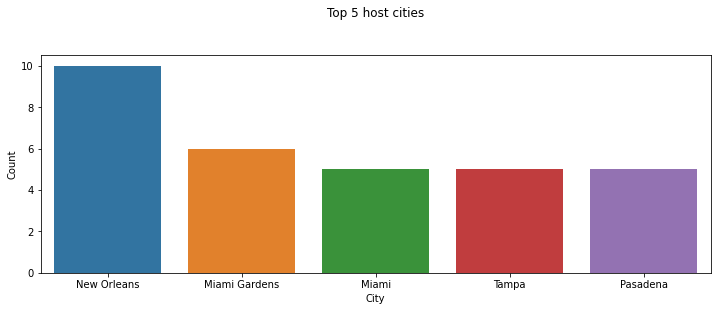

In [592]:
plt.figure(figsize=(12,4))
x = sns.barplot(x='City', y='Count', data=city_count1.head())
x.set_title('Top 5 host Cities', y=1.15)
x.set(xlabel='City', ylabel='Count')
plt.show()

Now to move on to top 5 states to have had a game played in their area.

In [646]:
state_count = superbowl_new.groupby('State').sum()['Count'].reset_index().sort_values(by = 'Count', ascending=False)
state_count.head()

,State,Count
2,Florida,17
1,California,13
5,Louisiana,10
0,Arizona,4
9,Texas,4


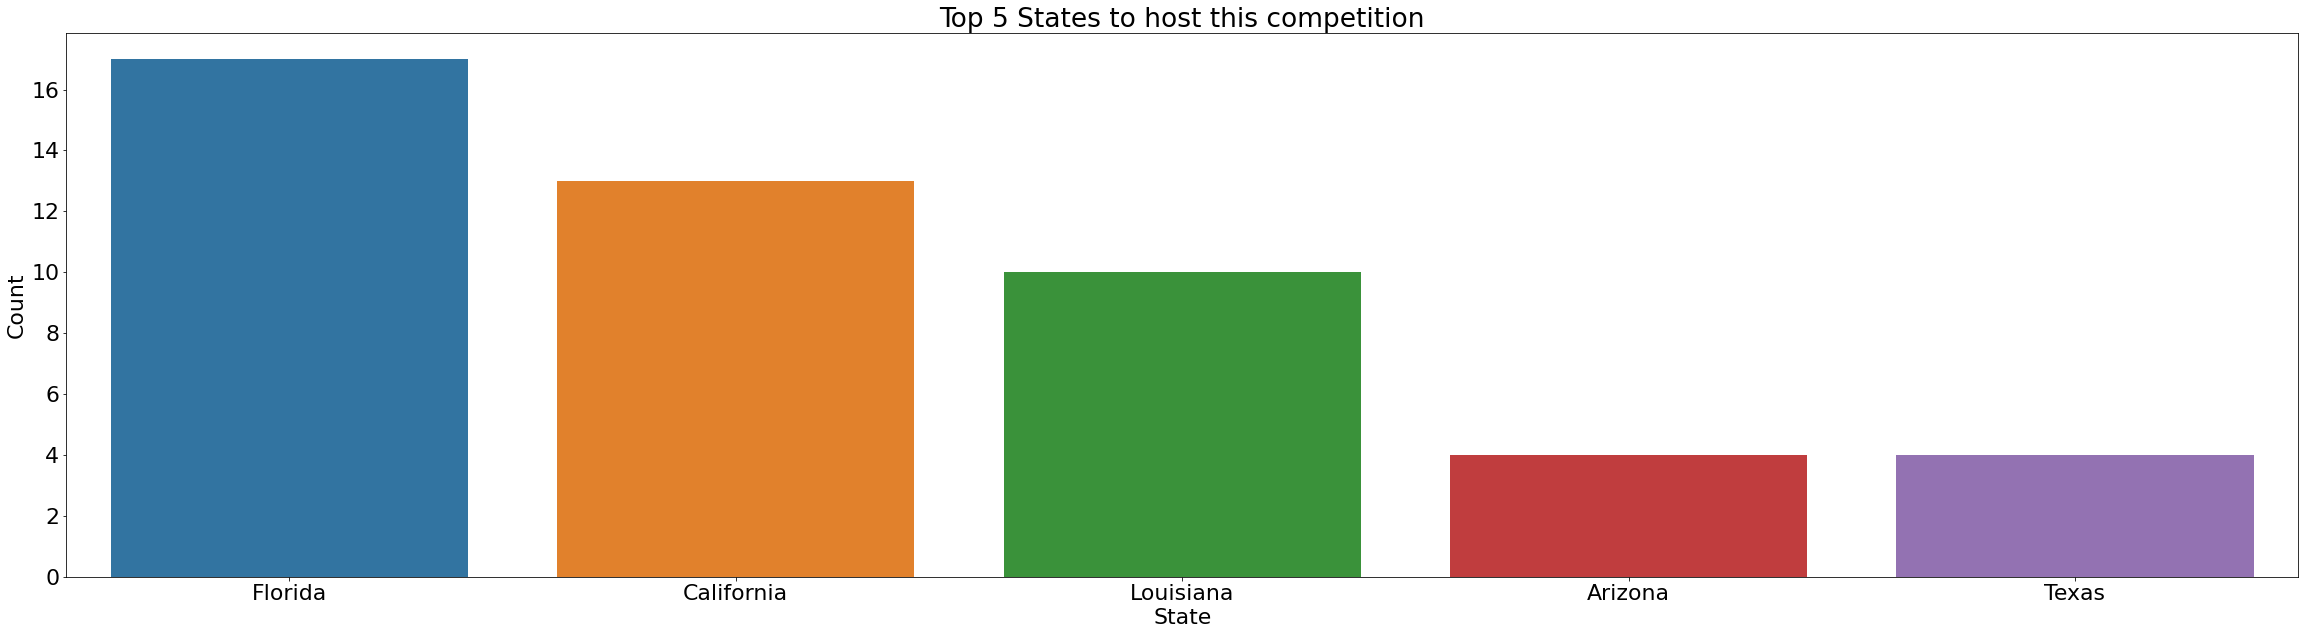

In [652]:
plt.figure(figsize=(40,10))
x = sns.barplot(x='State', y='Count', data=state_count.head())
x.set_title('Top 5 States to host this competition', y=1)
x.set(xlabel='State', ylabel='Count')
plt.show()

I will now scrape information from wikipedia on who has performed the national anthem each year at the superbowl

In [689]:
wiki_url = requests.get('https://en.wikipedia.org/wiki/List_of_national_anthem_performers_at_the_Super_Bowl')
tv = bs(wiki_url.content, 'lxml')

In [690]:
table = tv.find("table", {"class":"wikitable"})

In [691]:
pd.read_html(str(table))[0]

,No.,Yearly,Venue,Performer(s)[1]
0,I,1967,"Los Angeles Memorial Coliseum, California","The Pride of Arizona, Michigan Marching Band, ..."
1,II,1968,"Orange Bowl, Miami",GSU Tiger Marching Band
2,III,1969,"Orange Bowl, Miami",Lloyd Geisler of the Washington National Symph...
3,IV,1970,"Tulane Stadium, New Orleans","Doc Severinsen,[3] Pat O'Brien (actor who play..."
4,V,1971,"Orange Bowl, Miami",Tommy Loy (trumpet)
5,VI,1972,"Tulane Stadium, New Orleans",U.S. Air Force Academy Chorale
6,VII,1973,Los Angeles Memorial Coliseum,Little Angels (children's choir) of Chicago's ...
7,VIII,1974,"Rice Stadium, Houston, Texas",Charley Pride
8,IX,1975,"Tulane Stadium, New Orleans",New Orleans Chapter of the Society for the Pre...
9,X,1976,"Orange Bowl, Miami",Tom Sullivan


Finally we will move on to the MVP award to see who has won this iconic achievement whilst competing in this event

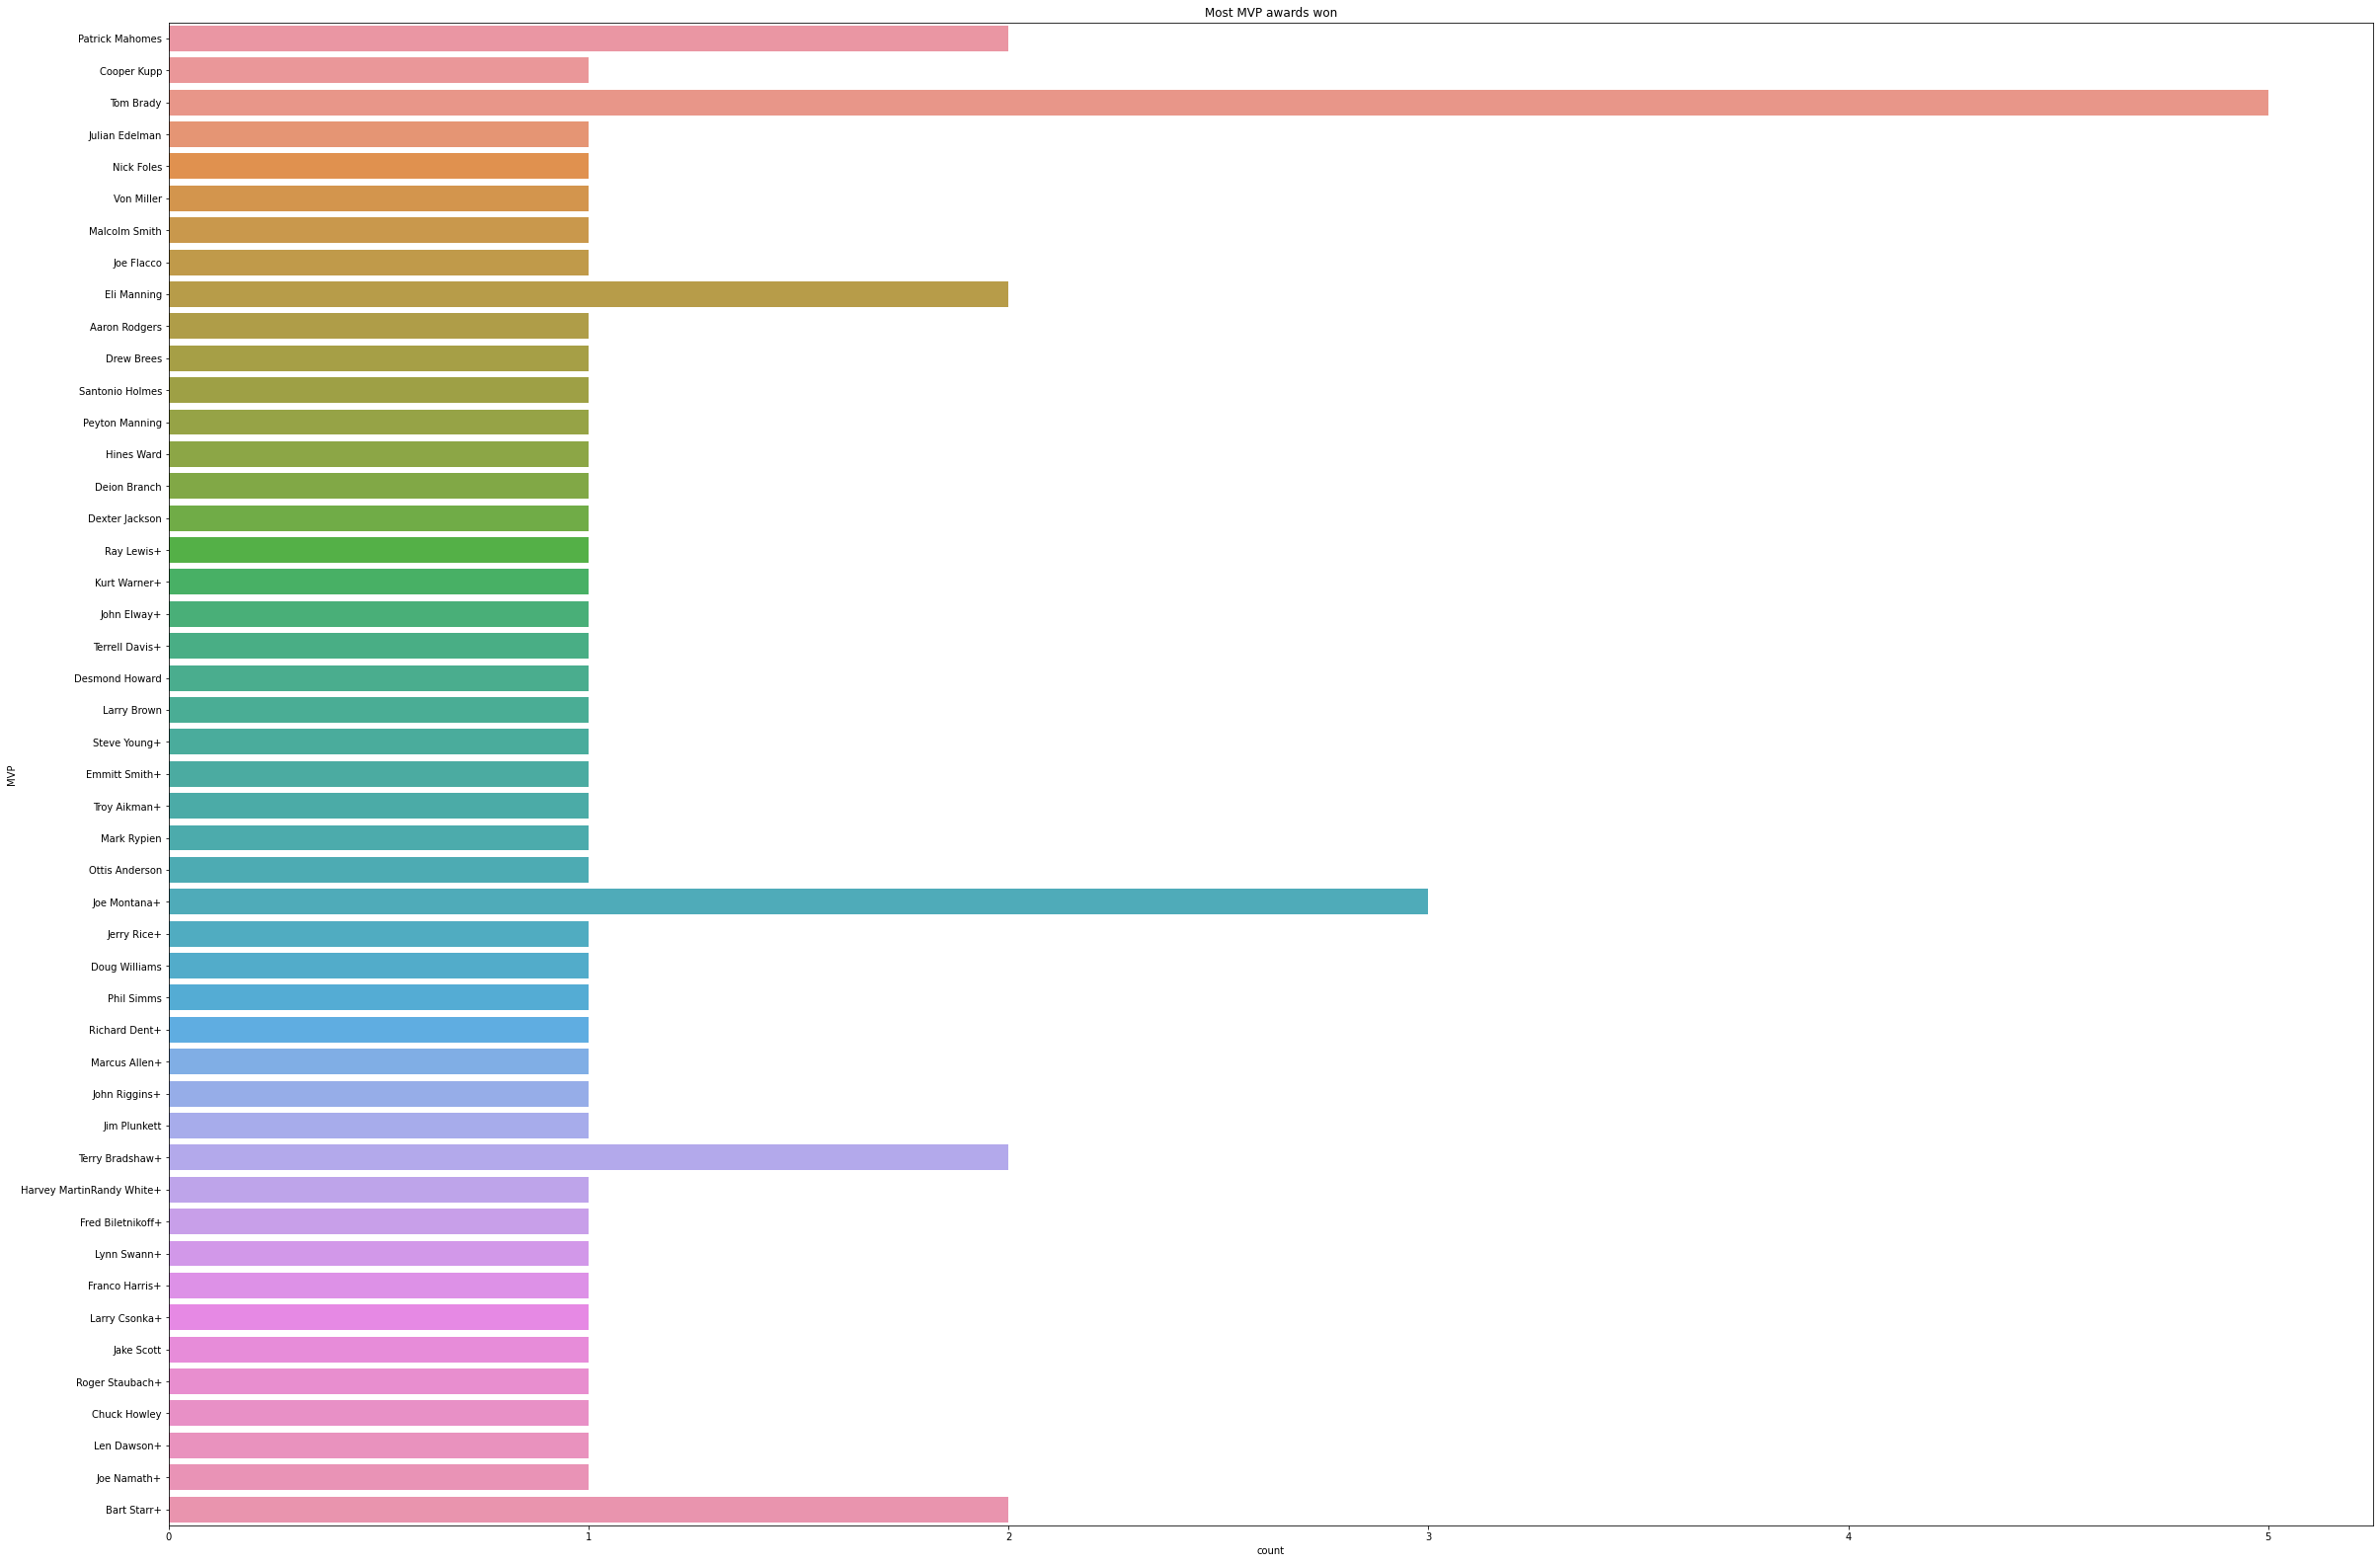

In [30]:
plt.figure(figsize=(40,28))
mvp = sns.countplot(y='MVP', data=superbowl_new)
mvp.set_title('Most MVP awards won', y=1)
plt.show()
